In [1]:
import os

ENDWITHS = 'pipeline'

NOTEBOOK_DIR = os.getcwd()

if not NOTEBOOK_DIR.endswith(ENDWITHS):
    raise ValueError(f"Not in correct dir, expect end with {ENDWITHS}, but got {NOTEBOOK_DIR} instead")

BASE_DIR = os.path.join(NOTEBOOK_DIR, '..', '..')

In [2]:
from ultralytics import YOLO
from YoloSeg import YoloSeg, plot_patch, plot_image
from MangaOCRModel import MangaOCRModel
from ElanMtJaEnTranslator import ElanMtJaEnTranslator
import cv2
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'Hiragino Sans', 'Yu Gothic', 'Meiryo', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']
import numpy as np
from math import ceil, floor

In [3]:
YOLO_MODEL_PATH = os.path.join(BASE_DIR, 'best.pt')
EX_IMG_PATH = os.path.join(BASE_DIR, 'data/Manga109_released_2023_12_07/images/AisazuNihaIrarenai/029.jpg')

Model load complete

image 1/1 /Volumes/HP_P900/Users/tungnguyen/Library/CloudStorage/GoogleDrive-nguyenlamtungthptltt@gmail.com/My Drive/Projects-Large/Group-Project-B3/code-just-to-preview/group-project-b3/code/pipeline/../../data/Manga109_released_2023_12_07/images/AisazuNihaIrarenai/029.jpg: 480x640 15 balloons, 78.9ms
Speed: 1.3ms preprocess, 78.9ms inference, 3.4ms postprocess per image at shape (1, 3, 480, 640)
Found 15 text bubbles
[[     910.38      46.875      1115.4      250.45]
 [      505.1      490.28      741.94      703.04]
 [     1442.5      541.14        1592      732.71]
 [     75.399      270.72      204.46      467.32]
 [     70.606      754.49      235.38      987.79]
 [     1255.1      68.915      1379.1      193.99]
 [     469.25      755.44      746.66      894.32]
 [     1087.1      785.18      1185.1      914.29]
 [     139.33      86.672       288.3      213.97]
 [     640.48      84.599      758.58      226.48]
 [     291.26      86.314      391.72      232

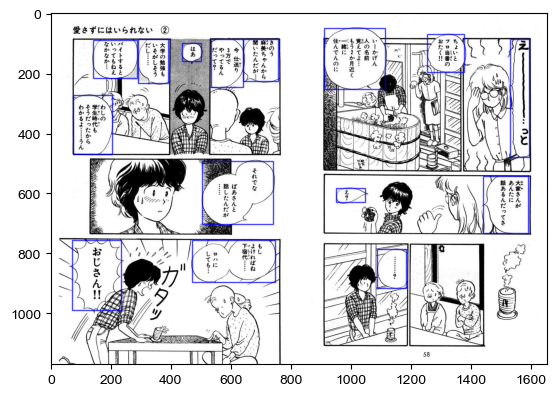

In [4]:
yolo_model = YoloSeg(YOLO_MODEL_PATH)
yolo_model.load_model()
image_rgb, boxes = yolo_model.predict(image_path=EX_IMG_PATH, print_bbox = True, plot = True)

In [5]:
image_rgb = np.array(image_rgb)
cropped_image_list = []

for box in boxes:
    cropped_image = image_rgb[ floor(box[1]): ceil(box[3]), floor(box[0]): ceil(box[2]), :]
    cropped_image_list.append(cropped_image)

text_ocr_list = []

manga_ocr_model = MangaOCRModel()
manga_ocr_model.load_model()

for cropped_img in cropped_image_list:
    text = manga_ocr_model.predict(cropped_img)
    text_ocr_list.append(text)

for text in text_ocr_list:
    print(text)


2025-11-13 03:48:33.579 | INFO     | manga_ocr.ocr:__init__:16 - Loading OCR model from kha-white/manga-ocr-base
2025-11-13 03:48:37.261 | INFO     | manga_ocr.ocr:__init__:25 - Using MPS
2025-11-13 03:48:38.249 | INFO     | manga_ocr.ocr:__init__:35 - OCR ready


いーかげん人の名前覚えてよ．．．もう２か月近く一緒に住んでんのに
それでなばあさんと話したんだが．．．
大家さんがあんたに話あるんだってさ
わしの学生時代もそうだったからわかるよ．．．うん
おじさん！！
ちょいとフロ当番のおたく！！
もしよければね下宿代．．．．．．ロハにしても．．
．．．．．．？
バイトするといってもねえなかなか．．．
きのう麻美ちゃんから聞いたんだが．．．
大学の勉強もいそがしそうだし．．．
はぁ
今仕送り３万でやってるんだって？
え？
えーーー．．．っと


In [6]:
model_trans = ElanMtJaEnTranslator()
model_trans.load_model()

text_translated_list = []

for text in text_ocr_list:
    text_translated = model_trans.predict(text)
    text_translated_list.append(text_translated)

for i, (ocr, trans) in enumerate(zip(text_ocr_list, text_translated_list)):
    print(f"Bbox {i}")
    print(ocr)
    print(trans,"\n")

Device set to use mps:0


Bbox 0
いーかげん人の名前覚えてよ．．．もう２か月近く一緒に住んでんのに
Let me remember my name. I've been living together for almost two months. 

Bbox 1
それでなばあさんと話したんだが．．．
That's what I talked with my grandmother... 

Bbox 2
大家さんがあんたに話あるんだってさ
I heard that Oya-san talked to you. 

Bbox 3
わしの学生時代もそうだったからわかるよ．．．うん
My school days were too, so I understand... 

Bbox 4
おじさん！！
Uncle!! 

Bbox 5
ちょいとフロ当番のおたく！！
It's a lot of furo-toban otaku!! 

Bbox 6
もしよければね下宿代．．．．．．ロハにしても．．
If it's good, I'm going to be a boarder ... I'm going to be a boarder. 

Bbox 7
．．．．．．？
...? 

Bbox 8
バイトするといってもねえなかなか．．．
Even if I say I'm going to work a part-time job, it's pretty good. 

Bbox 9
きのう麻美ちゃんから聞いたんだが．．．
I heard it from Asami yesterday... 

Bbox 10
大学の勉強もいそがしそうだし．．．
I think I'm going to study hard in college. 

Bbox 11
はぁ
Haa 

Bbox 12
今仕送り３万でやってるんだって？
Are you saying you're paying 30,000? 

Bbox 13
え？
Eh? 

Bbox 14
えーーー．．．っと
Eh...t 



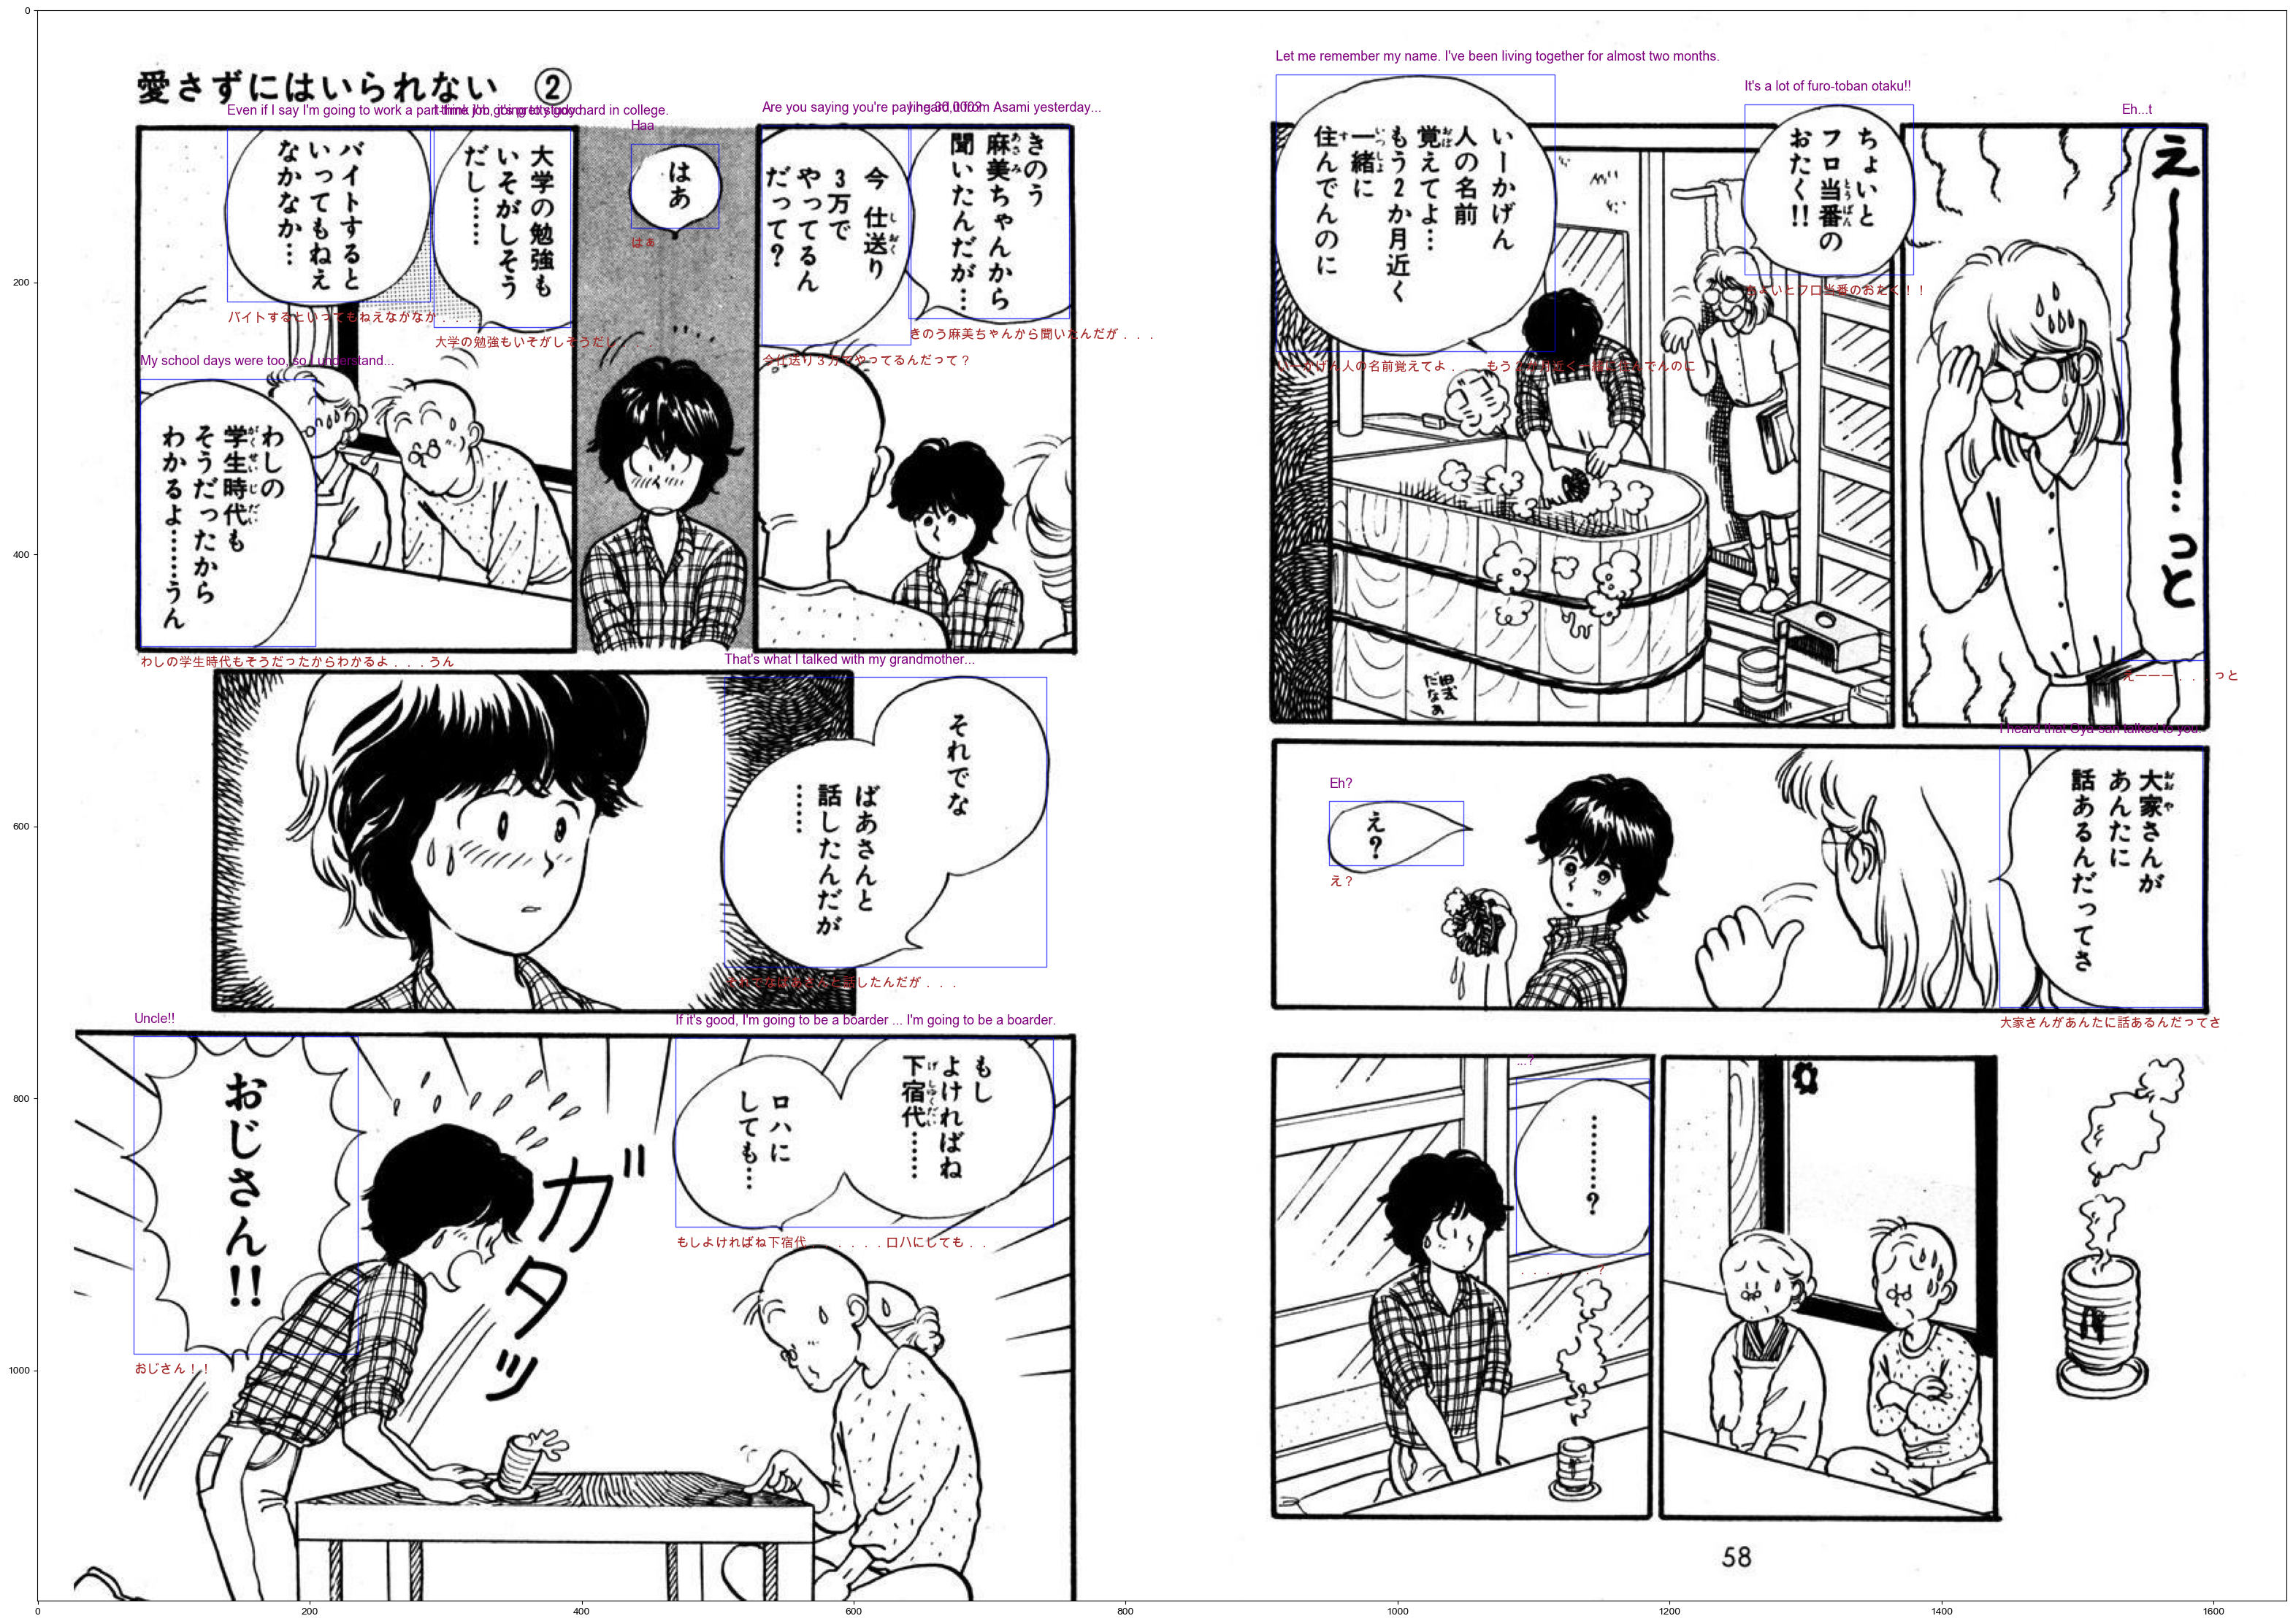

In [13]:
ratio = image_rgb.shape[1] / image_rgb.shape[0]
width = 40
height = width / ratio

fig, ax = plt.subplots(1, 1, figsize=(width, height))
ax = plot_image(ax, image = image_rgb, boxes=boxes, plot_bbox=True)

for box, ocr, trans in zip(boxes, text_ocr_list, text_translated_list):
    ax.text(x = box[0], y = box[3] + 15, s=ocr, fontsize=13, color="brown")
    ax.text(x = box[0], y = box[1] - 10, s=trans, fontsize=13, color="purple")
